[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed
                                   SNP         GOLD        VIX  BONDS
Date                                                                 
2001-01-02 00:00:00-05:00  1283.270020   268.399994  29.990000  4.752
2001-01-03 00:00:00-05:00  1347.560059   268.000000  26.600000  4.923
2001-01-04 00:00:00-05:00  1333.339966   267.299988  26.969999  4.808
2001-01-05 00:00:00-05:00  1298.349976   268.000000  28.670000  4.672
2001-01-08 00:00:00-05:00  1295.859985   268.000000  29.840000  4.601
...                                ...          ...        ...    ...
2022-12-23 00:00:00-05:00  3844.820068  1795.900024  20.870001  3.862
2022-12-27 00:00:00-05:00  3829.250000  1814.800049  21.650000  3.963
2022-12-28 00:00:00-05:00  3783.219971  1807.900024  22.139999  3.979
2022-12-29 00:00:00-05:00  3849.280029  1819.500000  21.440001  3.955
2022-12-30 00:00:00-05

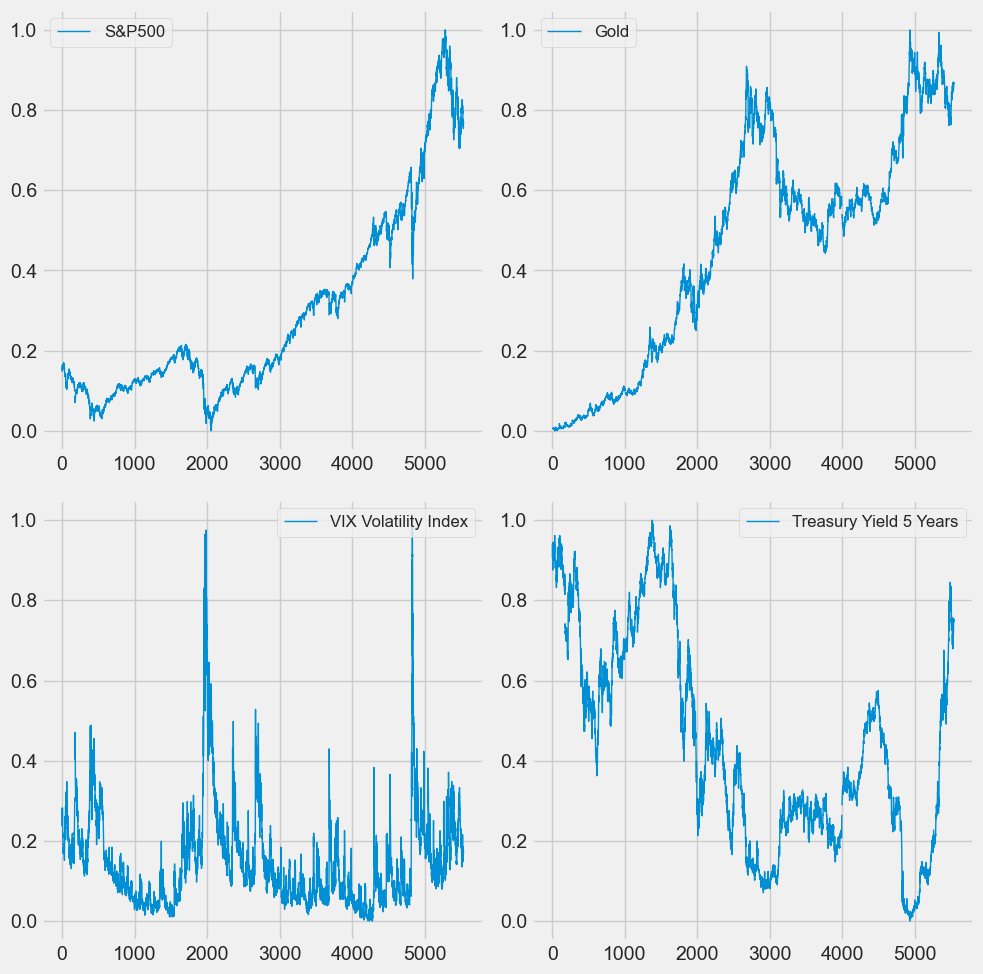

In [60]:
import sys
sys.path.insert(1, r"C:/Users/mihao/OneDrive - Univerza v Ljubljani/Doktorski_studij/Delo/Evolving transformer")
from importlib import reload 
import data.dataclass as dataclass
reload(dataclass)

database = dataclass.StockData()
#database.display_data()

database.display_data_norm()

print(database.data_dropped)
print(database.data_norm)

print(database.datasnp_dropped)

In [76]:
from fbprophet import Prophet
import statsmodels.api as sm


database.datasnp_dates.columns = ["ds","y"]
database.datasnp_dates["ds"] = database.datasnp_dates["ds"].dt.tz_localize(None)
print(database.datasnp_dates)

m = Prophet()
m.fit(database.datasnp_dates)

future_prices = m.make_future_dataframe(periods=5*365)
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds            y
0    2001-01-02  1283.270020
1    2001-01-03  1347.560059
2    2001-01-04  1333.339966
3    2001-01-05  1298.349976
4    2001-01-08  1295.859985
...         ...          ...
5530 2022-12-23  3844.820068
5531 2022-12-27  3829.250000
5532 2022-12-28  3783.219971
5533 2022-12-29  3849.280029
5534 2022-12-30  3839.500000

[5535 rows x 2 columns]


,ds,yhat,yhat_lower,yhat_upper
7355,2027-12-25,6539.376049,5397.091640,7725.026839
7356,2027-12-26,6542.792665,5406.176219,7804.347631
7357,2027-12-27,6545.917639,5353.758508,7804.009586
7358,2027-12-28,6549.900421,5375.594811,7799.431264
7359,2027-12-29,6553.508993,5418.227560,7814.654342


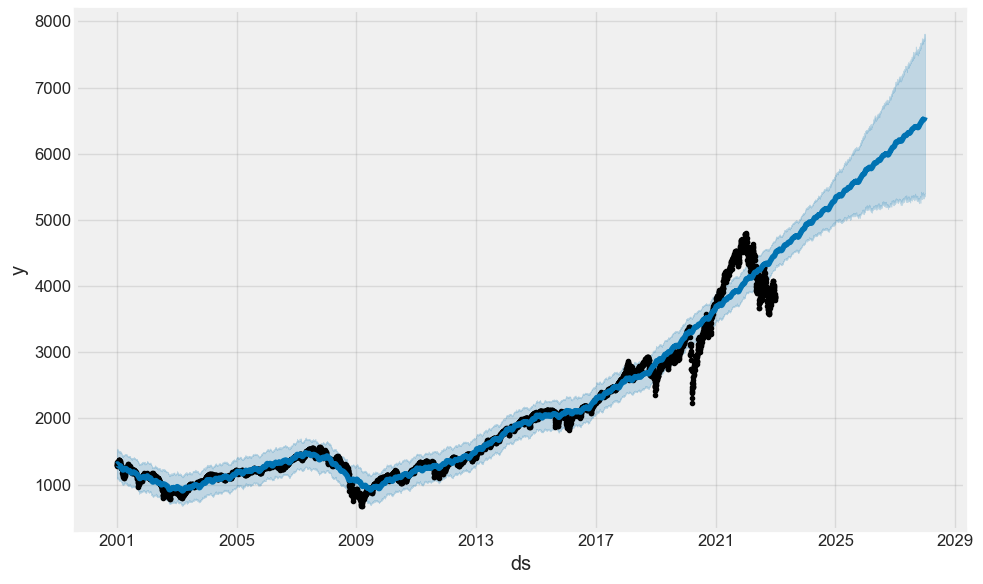

In [77]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
#ax1 = fig.add_subplot(111)
#ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
#ax1.set_xlabel("Date", fontsize=12)
#ax1.set_ylabel("Close Price", fontsize=12)

plt.show()